In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/commands')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
from Lfile import Lfile
from Ldate import Ldate
from readTrc_4CH import Trc
from Waveform import wf
from LyAdata24 import LyA_addDate, LyA_removeDate, clusters_data, read_df
import gbarDataLoader24 as gb
pd.set_option("display.max_columns",None)
#pd.set_option("display.max_rows",None)

In [2]:
df = pd.read_csv('/eos/experiment/gbar/datasummary/datafile24.txt', delimiter = '\t')

In [3]:
set(df.Date)

{'24_04_30',
 '24_05_01',
 '24_05_06',
 '24_05_08',
 '24_05_14',
 '24_05_16',
 '24_05_17',
 '24_05_21',
 '24_05_22',
 '24_05_23',
 '24_05_24',
 '24_05_25',
 '24_05_26',
 '24_05_28',
 '24_05_29',
 '24_05_30',
 '24_05_31',
 '24_06_06',
 '24_06_18',
 '24_06_19',
 '24_07_04',
 '24_07_05',
 '24_07_06',
 '24_07_07',
 '24_07_08',
 '24_07_09',
 '24_07_10',
 '24_07_11',
 '24_07_12',
 '24_07_14',
 '24_07_15',
 '24_07_22',
 '24_07_23',
 '24_07_24',
 '24_07_25',
 '24_07_26',
 '24_07_27',
 '24_07_28',
 '24_07_29',
 '24_07_30',
 '24_07_31',
 '24_09_19',
 '24_09_20',
 '24_09_21'}

In [8]:
df[df.run_type == 4]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
14834,24_07_30,1.722355e+09,2024-07-30 18:03:10.947000,4,705.0,NaN,1,0.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,11.929,0.0,0.0,0.0,0.0,0.0,52.598,872451015.0,0.0,6.920102e-02,4.950000e-10,1.400000e-08,2.788000e-09,2.780000e-09,1.010000e-09,3.400000e-09,0.000902,0.001002,0.00101,0.000999,2.473594e-07,1.933965e-07,0.000086,49.95251,-49.98736,19.957170,-19.977190,4.930487,-4.988513,39.96953,-39.97817,-41.98921,41.95320,-4.986686,4.975922,-44.71988,45.02284,-39.71455,40.05454,0.132217,0.157026,0.099481,0.117262,0.022370,0.031738,0.026505,0.026708,0.031118,0.015214,0.018381,0.019697,-91.96048,91.81145,-106.9879,106.8264,-109.9734,109.7992,1099.948,-1099.908,599.9394,-599.8558,-3200.000,-3199.998,-3200.001,-2499.999,0.505503,-2300.003,-0.075553,-0.231540,-0.158462,-0.260526,-2000.003,-2000.005,-2000.008,-2000.005000,3000.001,-0.147833,-0.026119,-0.059818,-0.763885,-0.763802,0.102180,-0.024289,-0.010299,0.003138,-0.016155,-0.009377,0.079059,0.008004,-0.030254,-0.127857,-0.014161,4000.002,2250.002,-0.140635,-0.157167,-0.018447,-0.067687,-0.752161,-0.741825,0.000103,50.99996,0.00,9.82,51.6,1.162000e+09,-100.0,51.8,800000000.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14835,24_07_30,1.722355e+09,2024-07-30 18:03:24.697000,4,705.0,NaN,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/24_0...,None,Hminus_Commissioning_2024,0.0,7.342,0.0,0.0,0.0,0.0,0.0,26.645,872451015.0,0.0,6.919406e-02,4.930000e-10,1.400000e-08,2.796000e-09,2.760000e-09,1.010000e-09,3.420000e-09,0.000902,0.001002,0.00101,0.000999,2.358886e-07,1.903338e-07,0.000086,49.95261,-49.98706,19.956850,-19.977220,4.930546,-4.988989,39.97001,-39.97808,-41.98965,41.95343,-4.986494,4.975784,-44.71921,45.02222,-39.71414,40.05520,0.132984,0.157286,0.099608,0.117410,0.021375,0.033232,0.027251,0.025214,0.030620,0.016956,0.018132,0.020693,-91.96152,91.81158,-106.9879,106.8263,-109.9732,109.7997,1099.948,-1099.908,599.9402,-599.8558,-3199.997,-3199.999,-3200.001,-2499.995,0.515393,-2300.000,-0.075553,-0.229076,-0.156000,-0.258065,-2000.004,-2000.007,-2000.010,-2000.005000,3000.003,-0.147833,-0.027594,-0.062291,-0.763885,-0.763802,0.102180,-0.024289,-0.013267,0.007587,-0.016155,-0.007894,0.076587,0.000594,-0.031733,-0.115005,-0.014161,4000.002,2250.003,-0.141625,-0.150243,-0.001161,-0.072628,-0.752161,-0.741825,0.000103,50.99996,0.00,9.82,51.6,1.162000e+09,-100.0,51.8,800000000.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14836,24_07_30,1.722355e+09,2024-07-30 18:03:38.939000

In [9]:
df[df.run == 714]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
17491,24_09_19,1.726765e+09,2024-09-19 19:02:36.668000,4,714.0,NaN,1,0.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_09_19/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,11.325,0.0,0.0,0.0,0.0,0.0,42.398,268472263.0,0.0,6.645506e-02,1.550000e-09,8.020000e-09,8.980000e-09,1.510000e-08,6.930000e-09,3.940000e-08,0.000902,0.001004,0.00101,0.000999,3.438895e-07,0.000204,0.000086,49.95994,-49.98206,0.046081,0.031925,4.937614,-4.980651,39.97510,-39.97030,-41.98336,41.95845,-4.983608,4.978628,-59.79850,59.98106,-39.78398,39.99248,-0.027847,-0.005943,0.014312,0.024771,0.018139,0.028501,0.021775,0.019488,0.024643,0.012228,0.009421,0.013228,-92.07421,91.71504,-108.1120,107.7086,-110.0869,109.6983,1099.814,-1099.991,599.8218,-599.9705,-3200.001,-3199.999,-3199.998,-2499.998,0.500558,-1799.998,-0.075553,-0.234004,-0.158462,-0.169475,2000.003,1999.996,1999.998,1999.999000,3000.002,-1999.998,-0.048980,-0.052396,-0.763885,-0.028009,-0.522738,-0.625668,-0.595016,-0.639437,-0.057618,-0.053872,0.039507,-0.055724,-0.086480,-0.124891,-0.014161,4000.007,2250.007,-0.146576,-0.151232,0.006247,-0.055335,-0.752161,-0.741825,0.000103,51.00024,0.00,9.88,50.6,1.162000e+09,-100.0,50.6,1.060000e+09,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17492,24_09_19,1.726765e+09,2024-09-19 19:02:50.926000,4,714.0,NaN,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_09_19/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_09_19/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_09_19/24_0...,None,Hminus_Commissioning_2024,0.0,9.892,0.0,0.0,0.0,0.0,0.0,42.129,268472263.0,0.0,6.643184e-02,1.550000e-09,7.980000e-09,8.920000e-09,1.510000e-08,6.910000e-09,3.930000e-08,0.000902,0.001004,0.00101,0.000999,3.626336e-07,0.000204,0.000086,49.96073,-49.98192,0.046387,0.031870,4.937848,-4.980772,39.97492,-39.97018,-41.98315,41.95869,-4.983800,4.979060,-59.80062,59.98097,-39.78533,39.99301,0.000897,0.027238,0.008411,0.019611,0.017392,0.028003,0.022024,0.020235,0.024643,0.011481,0.008674,0.010989,-92.07349,91.71535,-108.1117,107.7083,-110.0859,109.6977,1099.812,-1099.990,599.8221,-599.9695,-3199.994,-3199.997,-3200.003,-2500.002,0.542591,-1800.001,-0.075553,-0.234004,-0.156000,-0.169475,2000.001,1999.996,1999.999,1999.998000,3000.002,-1999.999,-0.034231,-0.042502,-0.763885,-0.027596,-0.522738,-0.605906,-0.602426,-0.639437,-0.063542,-0.059804,0.054339,-0.066098,-0.086480,-0.127857,-0.014161,3999.998,2250.008,-0.149546,-0.149254,-0.003631,-0.030631,-0.752161,-0.741825,0.000103,51.00024,-0.01,9.87,50.6,1.162000e+09,-100.0,50.6,1.060000e+09,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17493,24_09_19,1.726765e+09,2024-09-19 19:03:04.985000,4,714.0,NaN

In [5]:
df

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
0,24_04_30,1.714464e+09,2024-04-30 09:56:33.481000,0,408.0,0.0,0,3.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,9.834,1.0,0.0,1.0,0.0,0.0,62.510,872451015.0,0.0,-4.354425e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000902,0.001000,0.00101,0.001007,1.908510e-07,0.000000e+00,0.000000e+00,49.96527,-49.98647,0.044840,0.026302,-19.980100,20.015470,0.029213,0.038521,0.035773,0.074914,-19.991590,19.980140,0.064666,0.013950,0.046203,0.000678,0.000897,0.011754,-0.004129,0.005606,0.015401,0.026758,0.022771,0.022725,0.028379,0.010485,0.006683,0.012979,14.676630,-15.043450,22.685780,-23.029250,14.710480,-14.983570,899.819200,-899.968700,599.840100,-599.953300,-3100.010000,-3299.997000,-2999.999000,-2800.002000,-2699.999000,-2200.005000,-0.075553,-0.231540,-0.153538,-0.157171,-2000.003000,-2000.003000,-2000.00100,-2000.002000,4000.000000,-0.147833,-0.019482,-0.035080,-0.763885,-0.763802,0.10218,-0.024289,-0.028105,-0.013173,-0.032444,-0.033107,0.022203,-0.012745,-0.046530,-0.127857,-0.014161,4000.000000,2200.000000,-0.130735,-0.157167,-0.011039,-0.035572,-0.752161,-0.741825,0.000103,50.975,0.0,0.00,50.8,1.162000e+09,-100.0,50.9,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24_04_30,1.714464e+09,2024-04-30 09:56:47.482000,0,408.0,0.0,0,3.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,1.683,1.0,0.0,1.0,0.0,0.0,42.505,872451015.0,0.0,-4.354425e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000902,0.001000,0.00101,0.001007,1.975657e-07,0.000000e+00,0.000000e+00,49.96545,-49.98561,0.045508,0.026950,-19.980020,20.015140,0.029613,0.038851,0.036207,0.075718,-19.991340,19.980370,0.064488,0.011549,0.046794,-0.000906,0.002371,0.001431,0.008411,0.001920,0.016894,0.029746,0.021029,0.019239,0.024643,0.008992,0.007430,0.014721,14.677430,-15.042250,22.685980,-23.028640,14.710950,-14.984970,899.820500,-899.969300,599.841000,-599.951800,-3100.009000,-3300.001000,-3000.003000,-2800.001000,-2699.998000,-2200.007000,-0.075553,-0.231540,-0.153538,-0.162092,-2000.008000,-2000.007000,-2000.00600,-2000.007000,4000.002000,-0.147833,-0.023907,-0.042502,-0.763885,-0.763802,0.10218,-0.024289,-0.026621,-0.013173,-0.035406,-0.028658,0.044451,-0.015709,-0.046530,-0.121926,-0.014161,4000.002000,2200.001000,-0.173307,-0.174972,-0.003631,-0.042983,-0.752161,-0.741825,0.000103,50.974,0.0,0.00,50.8,1.162000e+09,-100.0,50.9,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,

In [21]:
df = read_df()
df = df[df.run == 523]

In [22]:
s = list(df.beam_start)
e = list(df.beam_stop)

d = [bal-val for val,bal in zip(s,e)]

In [48]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df1 = df[[True if 487 <= val <= 512 else False for val in df['run']]].reset_index(drop = True)
df2 = df[[True if 521 <= val <= 545 else False for val in df['run']]].reset_index(drop = True)
df3 = df[df.run == 707].reset_index(drop = True)
d = read_df()
d1 = d[[True if 487 <= val <= 512 else False for val in d['run']]].reset_index(drop = True)
d2 = d[[True if 521 <= val <= 545 else False for val in d['run']]].reset_index(drop = True)
d3 = d[d.run == 707].reset_index(drop = True)

In [22]:
dat = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
dat = dat[dat.run == 707].reset_index(drop = True).iloc[:1200]
df = d3.iloc[:1200]

In [71]:
dat = df2
df = d2

In [72]:
t_ch1 = [val if val != 'None' else [] for val in df['time_ch1']]
t_ch2 = [val if val != 'None' else [] for val in df['time_ch2']]
t_ch3 = [val if val != 'None' else [] for val in df['time_ch3']]
t_ch4 = [val if val != 'None' else [] for val in df['time_ch4']]

h_ch1 = [val if val != 'None' else [] for val in df['height_ch1']]
h_ch2 = [val if val != 'None' else [] for val in df['height_ch2']]
h_ch3 = [val if val != 'None' else [] for val in df['height_ch3']]
h_ch4 = [val if val != 'None' else [] for val in df['height_ch4']]

fl = list(df.LyA)
fr = [1e-6*val for val in list(dat.sc_freq)]

t = [t_ch1, t_ch2, t_ch3, t_ch4]
h = [h_ch1, h_ch2, h_ch3, h_ch4]

tt = [[val for bal in t[0] for val in bal], [val for bal in t[1] for val in bal], [val for bal in t[2] for val in bal], [val for bal in t[3] for val in bal]]
hh = [[val for bal in h[0] for val in bal], [val for bal in h[1] for val in bal], [val for bal in h[2] for val in bal], [val for bal in h[3] for val in bal]]

In [79]:
ch = 3
temp_list = []

for i in range(len(t[ch])):
    if len(t[ch][i]) >= 13:
        temp_list += [fl[i]]
        print(len(t[ch][i]), fr[i], i, [t[ch][i][0], t[ch][i][-1]], fl[i], '\n')
    

13 1300.0 2308 [4829, 5492] /eos/experiment/gbar/pgunpc/data/24_06_19/24_06_19lya/LY1234.1718766817.037.trc 

13 800.0 2639 [4858, 6701] /eos/experiment/gbar/pgunpc/data/24_06_19/24_06_19lya/LY1234.1718785732.321.trc 



In [61]:
ch = 3
temp_list = []

for i in range(len(t[ch])):
    if len(t[ch][i]) == 1 and 0.12 < h[ch][i][0] < 0.2:
        temp_list += [fl[i]]
        print(i, t[ch][i][0], h[ch][i][0], fl[i], '\n')

2 4928 0.1850051060936783 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722365060.587.trc 

19 4832 0.19503238814328658 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722365341.580.trc 

29 5274 0.12796579440923278 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722365506.744.trc 

56 5425 0.12756672507219977 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722365967.833.trc 

57 4998 0.14038298665305105 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722365981.567.trc 

77 5035 0.1453628480252466 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722366328.854.trc 

83 5241 0.13717831203703434 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722366431.699.trc 

90 5121 0.1394668074407468 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722366557.562.trc 

128 4580 0.12793417443138355 /eos/experiment/gbar/pgunpc/data/24_07_30/24_07_30lya/LY1234.1722367191.652.trc 

151 6226 0.15

In [24]:
temp_list

[]

In [30]:
max(hh[0])

0.2906665578484535

In [9]:
t1 = [[],[],[],[]]
h1 = [[],[],[],[]]
fl1 = []

t2 = [[],[],[],[]]
h2 = [[],[],[],[]]
fl2 = []

fl = list(df.LyA)

for i in range(len(df)):
    if dat.loc[i, 'NE50_I'] <= 6:
        continue
    
    if dat.loc[i, 'sc_freq'] == 1e6:
        t1[0] += t_ch1[i]
        t1[1] += t_ch2[i]
        t1[2] += t_ch3[i]
        t1[3] += t_ch4[i]
        
        h1[0] += h_ch1[i]
        h1[1] += h_ch2[i]
        h1[2] += h_ch3[i]
        h1[3] += h_ch4[i]
        
        fl1 += [fl[i]]
        
    elif dat.loc[i, 'sc_freq'] == 1.06e9:
        t2[0] += t_ch1[i]
        t2[1] += t_ch2[i]
        t2[2] += t_ch3[i]
        t2[3] += t_ch4[i]
        
        h2[0] += h_ch1[i]
        h2[1] += h_ch2[i]
        h2[2] += h_ch3[i]
        h2[3] += h_ch4[i]
        
        fl2 += [fl[i]]
        
    else: print(i)

"\nt1 = [[],[],[],[]]\nh1 = [[],[],[],[]]\nfl1 = []\n\nt2 = [[],[],[],[]]\nh2 = [[],[],[],[]]\nfl2 = []\n\nfl = list(df.LyA)\n\nfor i in range(len(df)):\n    if dat.loc[i, 'NE50_I'] <= 6:\n        continue\n    \n    if dat.loc[i, 'sc_freq'] == 1e6:\n        t1[0] += t_ch1[i]\n        t1[1] += t_ch2[i]\n        t1[2] += t_ch3[i]\n        t1[3] += t_ch4[i]\n        \n        h1[0] += h_ch1[i]\n        h1[1] += h_ch2[i]\n        h1[2] += h_ch3[i]\n        h1[3] += h_ch4[i]\n        \n        fl1 += [fl[i]]\n        \n    elif dat.loc[i, 'sc_freq'] == 1.06e9:\n        t2[0] += t_ch1[i]\n        t2[1] += t_ch2[i]\n        t2[2] += t_ch3[i]\n        t2[3] += t_ch4[i]\n        \n        h2[0] += h_ch1[i]\n        h2[1] += h_ch2[i]\n        h2[2] += h_ch3[i]\n        h2[3] += h_ch4[i]\n        \n        fl2 += [fl[i]]\n        \n    else: print(i)"

In [60]:
test = np.array([1,1,1,1,2,1,1,2,2,1, 1,1,1,1,1,1,1,3,1,2, 
                1,1,1,3,1,1,1,5,1,2, 1,1,1,1,1,3,1,1,2,1, 
                1,1,1,1,1,1,1,1,1,1, 1,1,1,2,2,1,3,1,1,1, 
                1,2,1,1,1,1,2,1,1,1, 1,1,3,1,1,1,1,1,1,1, 
                1,1,3,1,1,1,1,1,1,1, 1,1,1,1,1,1,2,1,1,1, #100
                1,6,1,2,1,1,1,1,1,3, 1,5,2,1,1,1,2,1,1,1, 
                1,1,1,2,1,1,1,1,1,1, 1,1,1,1,2,1,1,2,1,1, 
                1,1,1,1,1,1,1,1,1,1, 1,2,1,1,1,1,1,1,1,1, 
                1,1,2,2,1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,3, 
                1,2,1,1,1,1,1,2,1,1, 1,1,1,1,1,1,1,1,1,2]) #200

#test = [val if val<3 else 2 for val in test]

In [75]:
np.tan(0.0118)*1.69, 0.0118*180/np.pi

(0.019942925626247044, 0.6760901982543714)

In [5]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df = df[df.Date == '24_07_30'].reset_index(drop = True)

In [71]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df = df[[True if 521 <= val <= 545 else False for val in df['run']]].reset_index(drop = True)

In [76]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df = df[[True if 487 <= val <= 512 else False for val in df['run']]].reset_index(drop = True)

In [6]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df = df[df.run == 707].reset_index(drop = True)

In [2]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
df = df[df.run == 611].reset_index(drop = True)

In [3]:
df

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
0,24_07_07,1.720303e+09,2024-07-07 00:01:20.950000,0,611.0,2.0,1,0.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_07/WF12...,None,None,None,None,None,None,Pbar_2024_NewOptics,10.575,10.687,0.0,0.0,0.0,0.0,0.0,47.756,335580103.0,0.0,-4.325703e-07,1.210000e-08,9.160000e-09,2.767000e-09,3.040000e-09,5.610000e-09,1.010000e-09,0.000902,0.001006,0.00101,0.000999,2.526797e-07,2.009119e-07,0.000082,49.95284,-49.99543,9.955755,-9.980725,14.93278,-14.99933,-14.98434,14.95837,-34.99845,34.95155,9.956366,-9.965024,-37.78965,37.94401,-13.78493,13.97006,-59.77563,60.00453,-24.81211,25.04860,0.019632,0.033730,0.027002,0.026708,0.030869,0.014716,0.016888,0.019697,-73.03081,72.71915,-101.0741,100.7228,-133.0407,132.6959,1099.846,-1099.961,599.8519,-599.9326,-1549.998,-3300.000,-2199.999,-1499.999,0.374461,-2050.007,-0.075553,-0.221685,-0.158462,-0.167014,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,699.8707,-0.040028,-0.763885,-0.763802,0.10218,-0.024289,-0.019202,-0.007241,-0.016155,-0.013826,0.084003,-0.006817,-0.039132,-0.118960,-0.014161,3999.998,2200.000,-0.134695,-0.142330,-0.020916,-0.060276,-940.0053,-940.0034,0.000103,111.0,0.0,0.0,49.9,1.162000e+09,-3.0,49.8,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24_07_07,1.720303e+09,2024-07-07 00:03:14.951000,0,611.0,2.0,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_07/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_07/WF12...,None,None,None,None,None,None,Pbar_2024_NewOptics,10.639,10.793,0.0,0.0,0.0,0.0,0.0,48.316,335580103.0,0.0,-1.654325e-07,1.200000e-08,9.130000e-09,2.772000e-09,3.050000e-09,5.640000e-09,1.010000e-09,0.000902,0.001006,0.00101,0.000999,2.546368e-07,1.897735e-07,0.000083,49.95296,-49.99482,9.955699,-9.979516,14.93308,-14.99805,-14.98306,14.95822,-34.99633,34.95202,9.956091,-9.963717,-37.78760,37.94529,-13.78255,13.97143,-59.77462,60.00819,-24.80867,25.05303,0.022868,0.034975,0.029989,0.030940,0.033608,0.017702,0.020621,0.021937,-73.02839,72.72200,-101.0731,100.7225,-133.0374,132.6978,1099.847,-1099.958,599.8552,-599.9311,-1549.998,-3299.999,-2200.004,-1500.001,0.352208,-2049.998,-0.075553,-0.226613,-0.156000,-0.167014,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,699.8721,-0.062291,-0.763885,-0.763802,0.10218,-0.024289,-0.013267,-0.007241,-0.023559,-0.016793,0.064227,-0.005335,-0.040611,-0.124891,-0.014161,3999.999,2199.998,-0.147566,-0.144308,0.008716,-0.035572,-939.9993,-940.0010,0.000103,111.0,0.0,0.0,49.9,1.162000e+09,-3.0,49.8,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24_07_07,1.720304e+09,2024-07-07 00:05:15.675000,0,611.0,2.0,3,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/d

In [7]:
df_ped = df[[True if val in ['/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif','/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif'] else False for val in df.MCP5]]

In [10]:
list(df_ped.MCP5)

['/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif',
 '/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif']

In [11]:
df_ped

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
13241,24_07_23,1.721725e+09,2024-07-23 10:56:38.838000,0,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-...,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872451015.0,16.0,-4.107396e-07,5.130000e-10,1.120000e-08,2.599000e-09,2.810000e-09,1.010000e-09,3.340000e-09,0.000902,0.001,0.00101,0.000999,4.437702e-07,2.490849e-07,0.000087,49.96323,-49.98025,9.964213,-9.965590,0.043355,0.02547,0.054715,0.057201,0.070907,0.095093,0.043415,0.078231,-0.009428,-0.016714,-0.023952,-0.06636,0.008267,0.005855,0.016525,-0.000291,0.022619,0.033232,0.027002,0.028700,0.034854,0.016956,0.017137,0.020444,0.021105,0.029951,-0.009691,0.038221,0.046451,0.112917,-0.009333,0.018404,0.083503,0.014528,-1550.008,-3300.000,-2200.000,-1499.997,0.399186,0.061871,-0.075553,-0.234004,-0.160924,-0.415559,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.029807,-0.049923,-0.763885,-0.763802,0.10218,-0.024289,-0.016235,-0.001310,-0.016155,-0.015310,0.061755,-0.000888,-0.037652,-0.124891,-0.014161,4000.003,2250.005,-0.141625,-0.162113,0.006247,-0.052865,-940.0051,-940.004900,0.000103,93.0,0.0,0.0,50.0,1.162000e+09,-100.0,49.7,9.100000e+08,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13503,24_07_25,1.721937e+09,2024-07-25 21:47:40.877000,0,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-...,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872582085.0,16.0,-2.280892e-07,5.180000e-10,1.190000e-08,3.431000e-09,3.740000e-09,1.010000e-09,6.030000e-09,0.000902,0.001,0.00101,0.000999,4.683776e-07,2.607819e-07,0.000087,49.95737,-49.98717,9.957537,-9.972252,14.938450,-14.99268,-14.976690,14.962050,-32.988560,32.956160,14.960880,-14.963720,-31.729550,32.010070,-28.731080,29.03518,-59.721410,60.063110,-24.753600,25.103890,0.027099,0.033979,0.030985,0.026957,0.035850,0.020191,0.020123,0.022434,-87.397360,87.127670,-97.746070,97.449390,-103.169500,102.925300,0.002466,-0.017732,0.096785,0.017477,-1550.003,-3300.008,-2200.003,-1500.004,0.371988,-2150.002000,-0.075553,-0.241395,-0.170772,-0.324508,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.023907,-0.052396,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,-0.005759,-0.010232,-0.016793,0.071643,-0.000888,-0.031733,-0.125880,-0.014161,4000.002,2250.000,-0.147566,-0.152221,-0.023386,-0.045454,-939.9947,-0.741825,0.000103,111.0,0.0,0.0,51.2,1.162000e+09,-100.0,51.0,1.000000e+09,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df[df.MCP5 == '/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-SwY_exp_1_us_1721724998.838.dark.tif']

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
13241,24_07_23,1.721725e+09,2024-07-23 10:56:38.838000,0,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-...,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872451015.0,16.0,-4.107396e-07,5.130000e-10,1.120000e-08,2.599000e-09,2.810000e-09,1.010000e-09,3.340000e-09,0.000902,0.001,0.00101,0.000999,4.437702e-07,2.490849e-07,0.000087,49.96323,-49.98025,9.964213,-9.96559,0.043355,0.02547,0.054715,0.057201,0.070907,0.095093,0.043415,0.078231,-0.009428,-0.016714,-0.023952,-0.06636,0.008267,0.005855,0.016525,-0.000291,0.022619,0.033232,0.027002,0.0287,0.034854,0.016956,0.017137,0.020444,0.021105,0.029951,-0.009691,0.038221,0.046451,0.112917,-0.009333,0.018404,0.083503,0.014528,-1550.008,-3300.0,-2200.0,-1499.997,0.399186,0.061871,-0.075553,-0.234004,-0.160924,-0.415559,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.029807,-0.049923,-0.763885,-0.763802,0.10218,-0.024289,-0.016235,-0.00131,-0.016155,-0.01531,0.061755,-0.000888,-0.037652,-0.124891,-0.014161,4000.003,2250.005,-0.141625,-0.162113,0.006247,-0.052865,-940.0051,-940.0049,0.000103,93.0,0.0,0.0,50.0,1.162000e+09,-100.0,49.7,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df[df.MCP5 == '/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-SwY_exp_10_us_1721936860.877.dark.tif']

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
13503,24_07_25,1.721937e+09,2024-07-25 21:47:40.877000,0,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_25/PCO-...,None,None,None,None,None,None,None,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872582085.0,16.0,-2.280892e-07,5.180000e-10,1.190000e-08,3.431000e-09,3.740000e-09,1.010000e-09,6.030000e-09,0.000902,0.001,0.00101,0.000999,4.683776e-07,2.607819e-07,0.000087,49.95737,-49.98717,9.957537,-9.972252,14.93845,-14.99268,-14.97669,14.96205,-32.98856,32.95616,14.96088,-14.96372,-31.72955,32.01007,-28.73108,29.03518,-59.72141,60.06311,-24.7536,25.10389,0.027099,0.033979,0.030985,0.026957,0.03585,0.020191,0.020123,0.022434,-87.39736,87.12767,-97.74607,97.44939,-103.1695,102.9253,0.002466,-0.017732,0.096785,0.017477,-1550.003,-3300.008,-2200.003,-1500.004,0.371988,-2150.002,-0.075553,-0.241395,-0.170772,-0.324508,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.023907,-0.052396,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,-0.005759,-0.010232,-0.016793,0.071643,-0.000888,-0.031733,-0.12588,-0.014161,4000.002,2250.0,-0.147566,-0.152221,-0.023386,-0.045454,-939.9947,-0.741825,0.000103,111.0,0.0,0.0,51.2,1.162000e+09,-100.0,51.0,1.000000e+09,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df[[True if (val == 'Pbar_2024_NewOptics' and bal != 'None') else False for val,bal in zip(df.NE50_I, df.LyA)]]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8


In [6]:
df[df.run_type == 5]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
13242,24_07_23,1.721725e+09,2024-07-23 11:04:29.913000,5,666.0,NaN,1,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_23/WF12...,None,None,None,None,None,None,None,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,872451015.0,16.0,-4.194456e-08,5.140000e-10,1.120000e-08,2.580000e-09,2.810000e-09,1.010000e-09,3.340000e-09,0.000902,0.001002,0.00101,0.000999,4.418109e-07,2.449075e-07,0.000087,49.95775,-49.98351,9.959093,-9.968986,0.044101,0.025969,0.057207,0.063431,0.067665,0.101079,0.039427,0.075239,-0.013851,-0.046945,-0.036483,-0.094365,-0.007947,0.029450,0.014312,0.020348,0.019135,0.031489,0.025260,0.025463,0.031118,0.015463,0.017386,0.018204,0.008574,0.027739,-0.003794,0.050761,0.044239,0.114392,-0.004909,0.019878,0.084979,0.010841,-1550.009,-3300.003,-2199.994,-1500.000,0.344790,0.061871,-0.075553,-0.243859,-0.165848,-0.418019,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.024644,-0.044975,-0.763885,-0.763802,0.10218,-0.024289,-0.013267,-0.002793,-0.016155,-0.015310,0.049395,-0.008299,-0.034693,-0.127857,-0.014161,3999.999,2250.000,-0.146576,-0.154200,0.006247,-0.042983,-0.752161,-0.741825,0.000103,93.0,0.0,0.0,50.1,1.162000e+09,-100.0,49.8,9.100000e+08,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13243,24_07_23,1.721726e+09,2024-07-23 11:06:25.631000,5,666.0,NaN,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_23/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_23/WF12...,None,None,None,None,None,None,None,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.000,872451015.0,16.0,-2.127608e-07,5.130000e-10,1.120000e-08,2.580000e-09,2.810000e-09,1.010000e-09,3.340000e-09,0.000902,0.001002,0.00101,0.000999,4.392920e-07,2.524265e-07,0.000087,49.96009,-49.98186,9.960644,-9.966803,0.050575,0.032694,0.056957,0.064677,0.071156,0.099582,0.045658,0.080724,-0.011639,-0.017451,-0.046803,-0.056779,-0.022687,0.030925,0.018000,0.029931,0.018637,0.033481,0.025260,0.024467,0.030620,0.014218,0.013154,0.014970,0.024053,0.024789,-0.000845,0.050024,0.044976,0.118818,-0.007859,0.021353,0.085717,0.004943,-1550.000,-3300.002,-2200.003,-1500.005,0.302758,0.061871,-0.075553,-0.243859,-0.170772,-0.413098,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.023907,-0.057344,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,-0.002793,-0.013193,-0.012343,0.064227,-0.006817,-0.031733,-0.131812,-0.014161,4000.001,2250.003,-0.150536,-0.155189,-0.001161,-0.052865,-0.752161,-0.741825,0.000103,93.0,0.0,0.0,50.1,1.162000e+09,-100.0,49.8,9.100000e+08,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13244,24_07_23,1.721726e+09,2024-07-23 11:08:24.435000,5,666.0,NaN,3,0.0,0,0,None,None,None,None,None,/eos/experimen

In [3]:
df

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
0,24_04_30,1.714464e+09,2024-04-30 09:56:33.481000,0,408.0,0.0,0,3.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,9.834,1.0,0.0,1.0,0.0,0.0,62.510,872451015.0,0.0,-4.354425e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000902,0.001000,0.00101,0.001007,1.908510e-07,0.000000e+00,0.000000e+00,49.96527,-49.98647,0.044840,0.026302,-19.980100,20.015470,0.029213,0.038521,0.035773,0.074914,-19.991590,19.980140,0.064666,0.013950,0.046203,0.000678,0.000897,0.011754,-0.004129,0.005606,0.015401,0.026758,0.022771,0.022725,0.028379,0.010485,0.006683,0.012979,14.676630,-15.043450,22.685780,-23.029250,14.710480,-14.983570,899.819200,-899.968700,599.840100,-599.953300,-3100.010000,-3299.997000,-2999.999000,-2800.002000,-2699.999000,-2200.005000,-0.075553,-0.231540,-0.153538,-0.157171,-2000.003000,-2000.003000,-2000.00100,-2000.002000,4000.000000,-0.147833,-0.019482,-0.035080,-0.763885,-0.763802,0.10218,-0.024289,-0.028105,-0.013173,-0.032444,-0.033107,0.022203,-0.012745,-0.046530,-0.127857,-0.014161,4000.000000,2200.000000,-0.130735,-0.157167,-0.011039,-0.035572,-0.752161,-0.741825,0.000103,50.975,0.0,0.00,50.8,1.162000e+09,-100.0,50.9,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24_04_30,1.714464e+09,2024-04-30 09:56:47.482000,0,408.0,0.0,0,3.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,1.683,1.0,0.0,1.0,0.0,0.0,42.505,872451015.0,0.0,-4.354425e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000902,0.001000,0.00101,0.001007,1.975657e-07,0.000000e+00,0.000000e+00,49.96545,-49.98561,0.045508,0.026950,-19.980020,20.015140,0.029613,0.038851,0.036207,0.075718,-19.991340,19.980370,0.064488,0.011549,0.046794,-0.000906,0.002371,0.001431,0.008411,0.001920,0.016894,0.029746,0.021029,0.019239,0.024643,0.008992,0.007430,0.014721,14.677430,-15.042250,22.685980,-23.028640,14.710950,-14.984970,899.820500,-899.969300,599.841000,-599.951800,-3100.009000,-3300.001000,-3000.003000,-2800.001000,-2699.998000,-2200.007000,-0.075553,-0.231540,-0.153538,-0.162092,-2000.008000,-2000.007000,-2000.00600,-2000.007000,4000.002000,-0.147833,-0.023907,-0.042502,-0.763885,-0.763802,0.10218,-0.024289,-0.026621,-0.013173,-0.035406,-0.028658,0.044451,-0.015709,-0.046530,-0.121926,-0.014161,4000.002000,2200.001000,-0.173307,-0.174972,-0.003631,-0.042983,-0.752161,-0.741825,0.000103,50.974,0.0,0.00,50.8,1.162000e+09,-100.0,50.9,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,

In [20]:
d = df[df.run == 707].iloc[0]
d1 = d.PCOs_delay
d2 = d.LyA_delay
d1, d2, d2-d1

(0.0010019, 0.00101, 8.100000000000034e-06)

In [18]:
d1, d2, d2-d1

(0.001002, 0.00101, 7.999999999999978e-06)

In [19]:
set(df[df.run == 429].PCOs_delay), set(df[df.run == 429].LyA_delay)

({0.001002}, {0.00101})

In [3]:
df[df.run == 707]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
14873,24_07_30,1.722365e+09,2024-07-30 20:43:36.992000,4,707.0,NaN,1,0.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,9.962,0.0,0.0,0.0,0.0,0.0,58.922,872451015.0,0.0,6.962107e-02,4.850000e-10,1.430000e-08,2.821000e-09,2.810000e-09,1.010000e-09,3.400000e-09,0.000902,0.001002,0.00101,0.000999,2.420424e-07,1.936770e-07,0.000085,49.95747,-49.98340,19.96256,-19.97312,4.935593,-4.984668,39.97457,-39.97473,-41.98553,41.95791,-4.982494,4.980843,-44.72028,45.03085,-39.71127,40.06310,0.000897,0.027976,0.013574,0.018136,0.020628,0.030742,0.026505,0.029695,0.029375,0.014716,0.014897,0.018453,-91.95529,91.81754,-106.9831,106.8295,-109.9668,109.8039,1099.952,-1099.902,599.9430,-599.8515,-3200.005,-3200.005,-3200.000,-2500.001,0.520339,-2300.002,-0.075553,-0.229076,-0.158462,-0.253143,-2199.995,-2199.993,-2199.996,-2199.995,3000.000,-0.147833,-0.020957,-0.044975,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,0.004621,-0.014674,-0.016793,0.051867,0.002076,-0.030254,-0.117971,0.046287,4000.002,2250.001,-0.143606,-0.155189,-0.003631,-0.065217,-0.752161,-0.741825,0.000103,50.99998,0.0,9.82,51.7,1.162000e+09,-100.0,51.9,800000000.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14874,24_07_30,1.722365e+09,2024-07-30 20:44:06.853000,4,707.0,NaN,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/24_0...,None,Hminus_Commissioning_2024,0.0,5.349,0.0,0.0,0.0,0.0,0.0,0.019,872451015.0,0.0,6.956817e-02,4.840000e-10,1.430000e-08,2.807000e-09,2.810000e-09,1.010000e-09,3.400000e-09,0.000902,0.001002,0.00101,0.000999,2.409235e-07,2.148389e-07,0.000085,49.95767,-49.98296,19.96244,-19.97288,4.935855,-4.984001,39.97513,-39.97379,-41.98546,41.95807,-4.981951,4.980595,-44.71989,45.02902,-39.71311,40.06263,-0.002788,0.027976,0.008411,0.014451,0.024362,0.035971,0.023518,0.024965,0.028628,0.013970,0.015643,0.015716,-91.95529,91.81691,-106.9823,106.8289,-109.9664,109.8039,1099.951,-1099.901,599.9434,-599.8513,-3199.996,-3199.994,-3200.002,-2500.002,0.503031,-2300.001,-0.075553,-0.236467,-0.156000,-0.260526,-2199.996,-2199.996,-2199.999,-2199.997,3000.002,-0.147833,-0.024644,-0.032607,-0.763885,-0.763802,0.10218,-0.024289,-0.005848,0.003138,-0.013193,-0.013826,0.061755,0.006522,-0.033213,-0.117971,0.046287,3999.999,2250.001,-0.139646,-0.159146,0.001308,-0.047924,-0.752161,-0.741825,0.000103,50.99998,0.0,9.82,51.7,1.162000e+09,-100.0,51.9,800000000.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14875,24_07_30,1.722365e+09,2024-07-30 20:44:20.587000,4,707.0,NaN,3,0.0

In [8]:
df[[True if 1722405000 <= val <= 1722409200 else False for val in df.Time]]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
17262,24_07_31,1.722405e+09,2024-07-31 07:50:06.931000,4,707.0,NaN,2390,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_31/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_31/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_31/24_0...,None,Hminus_Commissioning_2024,0.0,11.353,0.0,0.0,0.0,0.0,0.0,72.977,872451015.0,0.0,-1.964603e-07,4.170000e-10,1.270000e-08,2.778000e-09,2.790000e-09,1.010000e-09,3.440000e-09,0.000902,0.001002,0.00101,0.000999,2.370162e-07,1.872693e-07,0.000087,49.94985,-49.99140,19.95501,-19.98252,4.927037,-4.993634,39.96615,-39.98223,-41.99281,41.94869,-4.990864,4.972502,-44.77124,44.97970,-39.76411,40.01061,0.003109,0.027238,-0.000441,0.021822,0.021126,0.031489,0.026007,0.026210,0.030869,0.012228,0.015643,0.016463,-92.02788,91.74268,-107.0582,106.7567,-110.0391,109.7275,1099.855,-1099.951,599.8586,-599.9200,-3200.001,-3199.994,-3199.991,-2499.995,0.512921,-2299.991,-0.075553,-0.234004,-0.156000,-0.267908,-2200.001,-2200.001,-2200.003,-2199.999,2999.998,-0.147833,-0.043081,-0.054870,-0.763885,-0.763802,0.10218,-0.024289,-0.014751,0.000173,-0.013193,-0.010860,0.056811,0.003558,-0.027294,-0.124891,-0.014161,3999.999,2250.000,-0.141625,-0.154200,-0.011039,-0.055335,-0.752161,-0.741825,0.000103,50.99998,0.0,10.18,50.7,1.162000e+09,-100.0,49.0,1000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17263,24_07_31,1.722405e+09,2024-07-31 07:50:21.574000,4,707.0,NaN,2391,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_31/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_31/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_31/24_0...,None,Hminus_Commissioning_2024,0.0,10.614,0.0,0.0,0.0,0.0,0.0,28.956,872451015.0,0.0,-2.266531e-07,4.180000e-10,1.270000e-08,2.772000e-09,2.780000e-09,1.010000e-09,3.440000e-09,0.000902,0.001002,0.00101,0.000999,2.370163e-07,1.911672e-07,0.000087,49.94924,-49.99180,19.95508,-19.98358,4.927011,-4.994509,39.96588,-39.98324,-41.99388,41.94819,-4.992451,4.971950,-44.77149,44.98106,-39.76355,40.01004,0.006056,0.027976,0.012099,0.026245,0.019632,0.032236,0.024762,0.025463,0.030869,0.013472,0.017137,0.016960,-92.02670,91.74232,-107.0577,106.7550,-110.0403,109.7261,1099.855,-1099.952,599.8580,-599.9200,-3199.994,-3200.005,-3200.006,-2500.005,0.522811,-2300.005,-0.075553,-0.231540,-0.163386,-0.265448,-2200.007,-2200.007,-2200.008,-2200.007,2999.999,-0.147833,-0.025382,-0.049923,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,0.001655,-0.017636,-0.012343,0.061755,0.005040,-0.028774,-0.132800,-0.014161,3999.999,2250.000,-0.141625,-0.153211,-0.011039,-0.052865,-0.752161,-0.741825,0.000103,50.99998,0.0,10.18,50.7,1.162000e+09,-100.0,49.0,1000000.0,-100.

In [7]:
df[[True if 1722405165.433 <= val <= 1722409200 else False for val in df.Time]]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
17272,24_07_31,1.722405e+09,2024-07-31 07:52:45.433000,4,707.0,NaN,2400,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_31/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_31/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_31/24_0...,None,Hminus_Commissioning_2024,0.0,7.570,0.0,0.0,0.0,0.0,0.0,39.043,872451015.0,0.0,-1.064578e-07,4.180000e-10,1.270000e-08,2.770000e-09,2.790000e-09,1.010000e-09,3.450000e-09,0.000902,0.001002,0.00101,0.000999,2.386939e-07,1.850417e-07,0.000087,49.95334,-49.98713,19.95895,-19.97765,4.930274,-4.988919,39.96886,-39.97800,-41.98804,41.95229,-4.985906,4.975663,-44.77441,44.97794,-39.76637,40.00946,0.006056,0.029450,-0.004129,0.021822,0.022868,0.033730,0.027500,0.023472,0.030122,0.015712,0.016888,0.017956,-92.02597,91.74324,-107.0570,106.7576,-110.0375,109.7284,1099.856,-1099.950,599.8608,-599.9176,-3199.998,-3199.999,-3199.995,-2499.994,0.522811,-2299.999,-0.075553,-0.234004,-0.160924,-0.265448,-2199.995,-2199.994,-2199.979,-2199.994,2999.996,-0.147833,-0.024644,-0.047449,-0.763885,-0.763802,0.10218,-0.024289,-0.014751,-0.001310,-0.014674,-0.012343,0.061755,-0.008299,-0.024335,-0.125880,-0.014161,3999.999,2249.998,-0.147566,-0.151232,-0.001161,-0.050394,-0.752161,-0.741825,0.000103,50.99998,0.0,10.18,50.7,1.162000e+09,-100.0,49.0,1000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17273,24_07_31,1.722405e+09,2024-07-31 07:52:59.675000,0,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_31/PCO-...,None,None,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,7.174,0.0,0.0,0.0,0.0,0.0,74.181,872451015.0,0.0,-2.733391e-07,4.190000e-10,1.270000e-08,2.780000e-09,2.790000e-09,1.010000e-09,3.440000e-09,0.000902,0.001002,0.00101,0.000999,2.535223e-07,1.967372e-07,0.000087,49.95350,-49.98664,19.95827,-19.97715,4.930786,-4.989306,39.96923,-39.97809,-41.98810,41.95233,-4.986100,4.976028,-44.77470,44.97877,-39.76519,40.00901,-0.024162,-0.000045,0.011362,-0.009137,0.017890,0.030991,0.024762,0.024218,0.026884,0.012725,0.015643,0.017707,-92.02734,91.74395,-107.0568,106.7562,-110.0379,109.7278,1099.857,-1099.951,599.8613,-599.9178,-3200.002,-3200.003,-3199.999,-2499.999,0.522811,-2299.999,-0.075553,-0.234004,-0.160924,-0.265448,-2199.995,-2199.997,-2199.976,-2199.995,3000.004,-0.147833,-0.026857,-0.037554,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,-0.001310,-0.016155,-0.012343,0.071643,-0.002370,-0.036172,-0.114017,-0.014161,4000.002,2250.003,-0.140635,-0.157167,0.001308,-0.050394,-0.752161,-0.741825,0.000103,50.99998,0.0,10.18,50.7,1.162000e+09,-100.0,49.0,1000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17274,24_07_31,1.722405e+09,2024-07-31 07:53:29.533000,0,

In [8]:
df[[True if 1722362400 <= val <= 1722365016.992 else False for val in df.Time]]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
14864,24_07_30,1.722363e+09,2024-07-30 20:07:42.532000,4,706.0,NaN,7,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/24_0...,None,None,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,872451015.0,0.000000e+00,-1.338941e-07,5.060000e-10,1.420000e-08,2.751000e-09,2.710000e-09,1.010000e-09,3.210000e-09,0.000902,0.001002,0.00101,0.000999,2.557516e-07,2.011942e-07,0.000047,49.95400,-49.98439,9.953082,-9.967738,14.935450,-14.990670,-14.97212,14.95762,-32.98666,32.95363,14.958180,-14.958510,-31.71986,32.02341,-22.72367,23.04015,-59.707480,60.077990,-24.744430,25.116790,0.025108,0.032734,0.027749,0.027455,0.033359,0.015712,0.018879,0.018951,-87.95941,87.77235,-98.01338,97.77336,-102.9764,102.7999,-0.006384,-0.028056,0.096047,0.025587,-1549.999,-3299.998,-2199.997,-1499.998,0.507976,-2150.001,-0.075553,-0.226613,-0.151076,-0.262987,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.020957,-0.037554,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,0.004621,-0.011713,-0.016793,0.081531,-0.000888,-0.030254,-0.114017,-0.014161,4000.000,1350.000,-0.143606,-0.153211,-0.001161,-0.062746,-0.752161,-0.741825,0.000103,93.00003,0.0,10.17,51.6,1.162000e+09,-100.0,51.7,800000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14865,24_07_30,1.722363e+09,2024-07-30 20:09:39.643000,4,706.0,NaN,8,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/24_0...,None,None,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,872451015.0,1.600000e+01,2.475201e-08,5.080000e-10,1.410000e-08,2.775000e-09,2.710000e-09,1.010000e-09,3.200000e-09,0.000902,0.001002,0.00101,0.000999,2.560306e-07,1.936761e-07,0.000047,49.95425,-49.98571,9.951977,-9.969298,14.934680,-14.992270,-14.97315,14.95687,-32.98799,32.95271,14.956870,-14.959180,-31.72063,32.02141,-22.72462,23.03767,-59.708040,60.077060,-24.745790,25.115070,0.021126,0.035473,0.028247,0.026459,0.031118,0.015960,0.015394,0.017956,-87.95673,87.77553,-98.01006,97.77694,-102.9738,102.8026,0.005416,-0.011832,0.093833,0.016002,-1549.997,-3299.998,-2199.994,-1500.004,0.359625,-2149.998,-0.075553,-0.234004,-0.156000,-0.260526,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.022432,-0.040028,-0.763885,-0.763802,0.10218,-0.024289,-0.010299,0.001655,-0.011713,-0.013826,0.076587,0.009486,-0.033213,-0.122914,-0.014161,3999.999,1350.000,-0.143606,-0.153211,-0.006100,-0.045454,-0.752161,-0.741825,0.000103,93.00003,0.0,10.16,51.6,1.162000e+09,-100.0,51.7,800000000.0,-100.0,0.0,0.0,0.

In [6]:
df[df.run == 707].Time.iloc[0]

1722365016.992

In [2]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
dff = pd.read_csv('/eos/experiment/gbar/datasummary/datafile24.txt', delimiter = '\t')

In [53]:
mix = df[[True if val in [609,614,616,619,621,622] else False for val in df.run]]
bkg = df[[True if val in [611,617,620,623] else False for val in df.run]]

In [3]:
dff[dff.run == 707]

,Date,Time,Datetime,run_type,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
14873,24_07_30,1.722365e+09,2024-07-30 20:43:36.992000,4,707.0,NaN,1,0.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,9.962,0.0,0.0,0.0,0.0,0.0,58.922,872451015.0,0.0,6.962107e-02,4.850000e-10,1.430000e-08,2.821000e-09,2.810000e-09,1.010000e-09,3.400000e-09,0.000902,0.001002,0.00101,0.000999,2.420424e-07,1.936770e-07,0.000085,49.95747,-49.98340,19.96256,-19.97312,4.935593,-4.984668,39.97457,-39.97473,-41.98553,41.95791,-4.982494,4.980843,-44.72028,45.03085,-39.71127,40.06310,0.000897,0.027976,0.013574,0.018136,0.020628,0.030742,0.026505,0.029695,0.029375,0.014716,0.014897,0.018453,-91.95529,91.81754,-106.9831,106.8295,-109.9668,109.8039,1099.952,-1099.902,599.9430,-599.8515,-3200.005,-3200.005,-3200.000,-2500.001,0.520339,-2300.002,-0.075553,-0.229076,-0.158462,-0.253143,-2199.995,-2199.993,-2199.996,-2199.995,3000.000,-0.147833,-0.020957,-0.044975,-0.763885,-0.763802,0.10218,-0.024289,-0.011783,0.004621,-0.014674,-0.016793,0.051867,0.002076,-0.030254,-0.117971,0.046287,4000.002,2250.001,-0.143606,-0.155189,-0.003631,-0.065217,-0.752161,-0.741825,0.000103,50.99998,0.0,9.82,51.7,1.162000e+09,-100.0,51.9,800000000.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14874,24_07_30,1.722365e+09,2024-07-30 20:44:06.853000,4,707.0,NaN,2,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_30/WF12...,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_30/24_0...,None,Hminus_Commissioning_2024,0.0,5.349,0.0,0.0,0.0,0.0,0.0,0.019,872451015.0,0.0,6.956817e-02,4.840000e-10,1.430000e-08,2.807000e-09,2.810000e-09,1.010000e-09,3.400000e-09,0.000902,0.001002,0.00101,0.000999,2.409235e-07,2.148389e-07,0.000085,49.95767,-49.98296,19.96244,-19.97288,4.935855,-4.984001,39.97513,-39.97379,-41.98546,41.95807,-4.981951,4.980595,-44.71989,45.02902,-39.71311,40.06263,-0.002788,0.027976,0.008411,0.014451,0.024362,0.035971,0.023518,0.024965,0.028628,0.013970,0.015643,0.015716,-91.95529,91.81691,-106.9823,106.8289,-109.9664,109.8039,1099.951,-1099.901,599.9434,-599.8513,-3199.996,-3199.994,-3200.002,-2500.002,0.503031,-2300.001,-0.075553,-0.236467,-0.156000,-0.260526,-2199.996,-2199.996,-2199.999,-2199.997,3000.002,-0.147833,-0.024644,-0.032607,-0.763885,-0.763802,0.10218,-0.024289,-0.005848,0.003138,-0.013193,-0.013826,0.061755,0.006522,-0.033213,-0.117971,0.046287,3999.999,2250.001,-0.139646,-0.159146,0.001308,-0.047924,-0.752161,-0.741825,0.000103,50.99998,0.0,9.82,51.7,1.162000e+09,-100.0,51.9,800000000.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14875,24_07_30,1.722365e+09,2024-07-30 20:44:20.587000,4,707.0,NaN,3,0.0

In [37]:
tst[13]

'MCP3.5'

In [25]:
set(df1.run_type)

{0, 5, 9}

In [11]:
dff

,Date,Time,Datetime,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
0,24_04_30,1.714464e+09,2024-04-30 09:56:33.481000,408.0,NaN,0,3.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,9.834,1.0,0.0,1.0,0.0,0.0,62.510,872451015.0,0.0,-4.354425e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000902,0.001000,0.00101,0.001007,1.908510e-07,0.000000e+00,0.000000e+00,49.96527,-49.98647,0.044840,0.026302,-19.980100,20.015470,0.029213,0.038521,0.035773,0.074914,-19.991590,19.980140,0.064666,0.013950,0.046203,0.000678,0.000897,0.011754,-0.004129,0.005606,0.015401,0.026758,0.022771,0.022725,0.028379,0.010485,0.006683,0.012979,14.676630,-15.043450,22.685780,-23.029250,14.710480,-14.983570,899.819200,-899.968700,599.840100,-599.953300,-3100.010000,-3299.997000,-2999.999000,-2800.002000,-2699.999000,-2200.005000,-0.075553,-0.231540,-0.153538,-0.157171,-2000.003000,-2000.003000,-2000.00100,-2000.002000,4000.000000,-0.147833,-0.019482,-0.035080,-0.763885,-0.763802,0.10218,-0.024289,-0.028105,-0.013173,-0.032444,-0.033107,0.022203,-0.012745,-0.046530,-0.127857,-0.014161,4000.000000,2200.000000,-0.130735,-0.157167,-0.011039,-0.035572,-0.752161,-0.741825,0.000103,50.975,0.0,0.00,50.8,1.162000e+09,-100.0,50.9,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24_04_30,1.714464e+09,2024-04-30 09:56:47.482000,408.0,NaN,0,3.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_04_30/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_04_30/WF12...,None,None,None,None,None,None,Hminus_Commissioning_2024,0.0,1.683,1.0,0.0,1.0,0.0,0.0,42.505,872451015.0,0.0,-4.354425e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000902,0.001000,0.00101,0.001007,1.975657e-07,0.000000e+00,0.000000e+00,49.96545,-49.98561,0.045508,0.026950,-19.980020,20.015140,0.029613,0.038851,0.036207,0.075718,-19.991340,19.980370,0.064488,0.011549,0.046794,-0.000906,0.002371,0.001431,0.008411,0.001920,0.016894,0.029746,0.021029,0.019239,0.024643,0.008992,0.007430,0.014721,14.677430,-15.042250,22.685980,-23.028640,14.710950,-14.984970,899.820500,-899.969300,599.841000,-599.951800,-3100.009000,-3300.001000,-3000.003000,-2800.001000,-2699.998000,-2200.007000,-0.075553,-0.231540,-0.153538,-0.162092,-2000.008000,-2000.007000,-2000.00600,-2000.007000,4000.002000,-0.147833,-0.023907,-0.042502,-0.763885,-0.763802,0.10218,-0.024289,-0.026621,-0.013173,-0.035406,-0.028658,0.044451,-0.015709,-0.046530,-0.121926,-0.014161,4000.002000,2200.001000,-0.173307,-0.174972,-0.003631,-0.042983,-0.752161,-0.741825,0.000103,50.974,0.0,0.00,50.8,1.162000e+09,-100.0,50.9,910000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24_04_30,1.71

In [25]:
len([1 for val in df[[True if val in [609.0, 616.0, 619.0, 622.0] else False for val in df.run]].Positron_Waveform if val == 'None'])

54

In [14]:
df[df.run == 609].Time.iloc[0]

1720276510.885

In [84]:
df[df.Date == '24_05_17'] == dff[dff.Date == '24_05_17']

ValueError: Can only compare identically-labeled DataFrame objects

In [131]:
df1 = df[df.Date == '24_05_17']
dff1 = dff[dff.Date == '24_05_17']

In [132]:
df1.shape, dff1.shape

((1402, 143), (1347, 143))

In [133]:
df1 = df1[[True if val in list(dff1.Time) else False for val in list(df1.Time)]].reset_index(drop = True)

In [135]:
list(df1.NE50_I) == list(dff1.NE50_I)

True

In [123]:
df1.NE50_I[1000]

0.0

In [1]:
df = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')

NameError: name 'pd' is not defined

In [9]:
df[df.Date == '24_07_15']

,Date,Time,Datetime,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
12834,24_07_15,1.720969e+09,2024-07-14 17:00:04.963000,646.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_15/PCO-...,None,None,None,None,None,None,None,None,Pbar_2024_NewOptics,9.947,10.185,0.0,0.0,0.0,0.0,0.0,46.351,335588295.0,0.000000e+00,-6.910258e-08,1.230000e-08,9.910000e-09,2.675000e-09,2.790000e-09,4.580000e-09,1.010000e-09,0.000902,0.001002,0.00101,0.000999,1.527976e-07,1.471707e-07,1.475446e-07,0.144134,0.019449,0.060303,0.039172,0.048334,0.031449,0.052971,0.058447,0.068912,0.097836,0.041172,0.076236,-0.010165,-0.021138,-0.029112,-0.06636,-0.005736,0.025026,0.010624,0.021085,0.020628,0.033232,0.026753,0.030193,0.032363,0.015712,0.018132,0.017956,0.027002,0.016677,-0.006743,0.04486,0.050138,0.115867,-0.003434,0.021353,0.084241,0.000520,0.106127,0.350519,0.345548,0.446148,0.520339,0.061871,-0.075553,-0.226613,-0.151076,-0.162092,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.028332,-0.047449,-0.763885,-0.763802,0.10218,-0.024289,-0.016235,-0.005759,-0.020597,-0.013826,0.084003,0.003558,-0.031733,-0.132800,-0.014161,-0.039034,-0.148704,-0.162417,-0.168048,-0.006100,-0.075098,-940.0019,-940.0068,0.000103,111.00000,0.0,0.0,50.3,1.162000e+09,-100.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12836,24_07_15,1.721033e+09,2024-07-15 10:39:37.348000,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_15/PCO-...,None,None,None,None,None,None,None,None,Pbar_2024_NewOptics,9.954,10.145,0.0,0.0,0.0,0.0,0.0,45.837,335588295.0,2.147484e+09,-1.832327e-07,1.250000e-08,1.030000e-08,2.754000e-09,2.830000e-09,4.710000e-09,1.010000e-09,0.000902,0.001002,0.00101,0.000999,2.577099e-07,2.109380e-07,5.017970e-05,49.956250,-49.985410,9.958185,-9.970691,19.945090,-19.988090,-9.968145,9.962992,-27.981950,27.952060,9.959253,-9.954786,-33.719430,34.026590,-13.711720,14.04139,-59.703440,60.079540,-24.741260,25.120520,0.023615,0.037216,0.027749,0.029197,0.035103,0.019444,0.017635,0.021439,-52.979140,52.789990,-62.980870,62.77589,-64.971740,64.766080,0.003204,-0.025106,0.077600,0.018951,-1550.003000,-3300.011000,-2200.002000,-1500.005000,0.532701,-2250.003000,-0.075553,-0.226613,-0.156000,-0.164553,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,-0.020957,-0.042502,-0.763885,-0.763802,0.10218,-0.024289,-0.013267,0.001655,-0.016155,-0.016793,0.071643,0.003558,-0.037652,4000.001000,1349.998000,3999.999000,1450.001000,-0.142616,-0.158156,-0.018447,-0.072628,-940.0058,-939.9994,0.000103,92.99997,0.0,0.0,50.9,1.162000e+09,-100.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12837,24_07_15,1.721033e+09,2024-07-15 10:51:08.557000,0.0,NaN,0,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24

In [25]:
dff = df[df.Date == '24_07_08']

In [30]:
dff[dff.event_number == 418]

,Date,Time,Datetime,run,run_mode,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_Waveform,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
12596,24_07_08,1.720439e+09,2024-07-08 13:46:48.353000,623.0,2.0,418,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_08/PCO-...,None,/eos/experiment/gbar/pgunpc/data/24_07_08/WF12...,None,None,None,None,None,None,Pbar_2024_NewOptics,10.249,10.376,0.0,0.0,0.0,0.0,0.0,47.938,335580103.0,0.0,-1.475098e-07,1.250000e-08,1.070000e-08,2.810000e-09,3.060000e-09,5.820000e-09,1.010000e-09,0.000902,0.001006,0.00101,0.000999,1.441208e-07,1.468935e-07,0.000083,49.95921,-49.98743,9.959498,-9.971904,14.93896,-14.99112,-14.97590,14.96316,-34.98938,34.95739,9.960839,-9.955023,-37.74565,37.98517,-13.74301,14.01052,-59.73524,60.04805,-24.77110,25.09091,0.020877,0.032485,0.026505,0.024716,0.030371,0.017205,0.014897,0.017956,-72.95909,72.79275,-101.0008,100.7942,-132.9701,132.7719,1099.944,-1099.912,599.9348,-599.8660,-1549.997000,-3299.997000,-2200.001000,-1500.012000,0.369515,-2050.015,-0.075553,-0.226613,-0.156000,-0.167014,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,699.9575,-0.052396,-0.763885,-0.763802,0.10218,-0.024289,-0.013267,-0.007241,-0.016155,-0.019759,0.059283,-0.008299,-0.037652,-0.124891,-0.014161,4000.002,2200.001,-0.136675,-0.142330,-0.001161,-0.055335,-940.0013,-940.0006,0.000103,111.0,0.0,0.0,50.4,1.162000e+09,-3.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12597,24_07_08,1.720439e+09,2024-07-08 13:48:49.547000,0.0,NaN,418,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_07_08/PCO-...,None,None,None,None,None,None,None,None,Pbar_2024_NewOptics,0.000,10.580,0.0,0.0,0.0,0.0,0.0,47.301,335776708.0,0.0,-3.082077e-07,1.240000e-08,1.090000e-08,2.875000e-09,3.150000e-09,5.860000e-09,1.010000e-09,0.000902,0.001006,0.00101,0.000999,1.441211e-07,1.354770e-07,0.000083,49.95772,-49.98877,9.958279,-9.973715,14.93840,-14.99305,-14.97820,14.96279,-34.99279,34.95687,9.959707,-9.956892,-37.74528,37.98537,-13.74298,14.01235,-59.73570,60.04782,-24.77285,25.09079,0.019632,0.033730,0.027002,0.024716,0.031616,0.014965,0.017635,0.019697,-72.96032,72.79288,-101.0018,100.7955,-132.9714,132.7711,1099.944,-1099.913,599.9357,-599.8676,-0.475129,-1.967002,-1.075619,-0.028744,0.354681,-2049.997,-0.075553,-0.226613,-0.153538,-0.167014,-0.777184,-0.719831,-0.73301,-0.767342,-0.004203,-0.147833,699.9588,-0.037554,-0.763885,-0.763802,0.10218,-0.024289,-0.016235,-0.004276,-0.019117,-0.015310,0.076587,-0.003852,-0.040611,-0.127857,-0.014161,3999.999,2200.000,-0.139646,-0.145297,-0.011039,-0.045454,-940.0009,-940.0023,0.000103,111.0,0.0,0.0,50.4,1.162000e+09,-3.0,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12598,24_07_08,1.720445e+09,2024-07-08 15:20:38.705000,0.0,NaN,418,0.0,0,0,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_

In [75]:
ldf = read_df()
ldf = ldf[[True if val in [609,611,616,619,622,623] else False for val in ldf.run]]
st = [val for val in ldf.beam_start if type(val) != str]
sp = [val for val in ldf.beam_stop if type(val) != str]
sd = [bal-val for val,bal in zip(st,sp)]

In [77]:
ldf

,Date,Time,LyA,MCP5_picture,MCP5_Waveform,run,microwave,NE50_I,time_ch1,height_ch1,time_ch2,height_ch2,time_ch3,height_ch3,time_ch4,height_ch4,MCP5_volt_sum,beam_start,beam_stop


In [76]:
np.max(sd), np.average([val for val in sd if val > 0])

ValueError: zero-size array to reduction operation maximum which has no identity

In [67]:
len([1 for val in sd if val == 0]), len(sd)

(940, 9892)

In [73]:
max(sp)

1.000000013351432e-05

In [74]:
len([1 for val in sp if val >= 5.280000070495561e-06])

8883

In [6]:
df2 = datafile[datafile.run == 623]
df2[df2.Waveform_12bit == 'None']

,Date,Time,Datetime,run,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_CH1,Positron_CH2,Positron_CH3,Positron_CH4,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8


In [9]:
gb.loadShortSummary('24_05_02')

SHORT SUMMARY file for 24_05_02 already exists.


,Time,Datetime,run,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_CH1,Positron_CH2,Positron_CH3,Positron_CH4,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8


In [65]:
lydf = read_df()

In [66]:
df = lydf[[True if 428 <= val <= 451 else False for val in lydf['run']]]

In [67]:
df

,Date,Time,LyA,MCP5_picture,MCP5_Waveform,run,microwave,NE50_I,time_ch1,height_ch1,time_ch2,height_ch2,time_ch3,height_ch3,time_ch4,height_ch4,MCP5_volt_sum,beam_start,beam_stop
351,24_05_16,1715882866.775,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,428,off,9.167,"[4753, 4860, 4998, 5079, 5111]","[0.10201146584219532, 0.02867803725163685, 0.0...","[4710, 4863, 4905, 4998, 5405, 5543]","[0.09868446152054822, 0.0966844589226239, 0.09...","[4874, 4946, 4994, 5013]","[0.14232451820725692, 0.1223244922280137, 0.06...","[4902, 4931, 5118, 5601, 7132]","[0.030709706557361643, 0.03204304162264452, 0....",5.286042,0.000005,0.000006
352,24_05_16,1715882881.991,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,428,off,10.304,None,None,"[4860, 5003, 5092, 5161, 5270, 5283]","[0.10406246850636672, 0.04139572043807129, 0.0...","[4798, 4959, 5032, 5177]","[0.13642851054857602, 0.10509513651442831, 0.0...","[4969, 5038, 5082, 5202, 5252]","[0.015411686685838503, 0.026078367208101555, 0...",5.824464,0.000005,0.000006
353,24_05_16,1715882895.276,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,428,off,11.154,"[4770, 4796, 4945, 4997, 5128, 5211]","[0.05135640004326706, 0.06002307796760579, 0.0...","[4718, 4827, 4879, 4970, 5002, 5127, 5182]","[0.1453334428369999, 0.0246940320765716, 0.026...","[4677, 4860, 4896, 4945, 4978, 5041, 5085, 5143]","[0.1453334428369999, 0.10829880734253675, 0.07...","[4812, 4998, 5051, 5903]","[0.04339572303599561, 0.08806244772297214, 0.0...",6.057515,0.000005,0.000006
354,24_05_16,1715882909.518,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,428,off,8.841,"[4799, 4920, 4934, 5010]","[0.03735104851753567, 0.06468441735583474, 0.0...","[4735, 4866, 4990, 5338, 5497]","[0.036005046769132604, 0.10733847276176675, 0....","[4369, 4745, 4843, 4854, 4883, 4967, 4980, 499...","[0.09278078718524194, 0.08211410666297889, 0.0...","[4809, 5019, 5039, 5114, 5165, 5487]","[0.032739709194254826, 0.05673974036934669, 0....",5.948273,0.000005,0.000006
355,24_05_16,1715882923.776,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,428,off,9.323,"[4944, 5179]","[0.014023018215346383, 0.08402310914269764]","[4861, 5017, 5168, 5304, 5319, 6902]","[0.03734238183961133, 0.04734239482923294, 0.0...","[4717, 4842, 4869, 4887, 4951, 4969, 5051, 5201]","[0.1453334428369999, 0.04711739453696646, 0.07...","[4854, 4960, 5082, 5214, 5309, 5354, 5658]","[0.1453334428369999, 0.10420946869731415, 0.06...",6.179868,0.000005,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,24_05_17,1715924945.937,/eos/experiment/gbar/pgunpc/data/24_05_17/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_17/WF12...,451,on,9.78,[4979],[0.09267957574313897],"[4574, 4742, 4776, 4792, 4928, 5088]","[0.1453334428369999, 0.039177559333748675, 0.0...","[4888, 4960, 5794]","[0.036759006629073845, 0.029743756236597974, 0...","[4790, 4852, 4986]","[0.0435080565152457, 0.03884138378675561, 0.11...",2.229439,0.000005,0.000006
2507,24_05_17,1715924960.195,/eos/experiment/gbar/pgunpc/data/24_05_17/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_17/WF12...,451,on,9.527,"[4801, 4918, 4995, 5057, 5642]","[0.020331465294117612, 0.031691738057254976, 0...","[4682, 4767, 4822, 4944]","[0.04539315743504607, 0.04216803385084817, 0.0...","[4842, 4878, 4920, 5352, 5458]","[0.048618492437432215, 0.08152011018365277, 0....","[4361, 4959, 5079]","[0.038805383739992975, 0.030138705815654247, 0...",2.640902,0.000005,0.000006
2508,24_05_17,1715924974.438,/eos/experiment/gbar/pgunpc/data/24_05_17/24_0...,None,/eos/experiment/gbar/pgunpc/data/24_05_17/WF12...,451,on,10.685,"[4931, 5013]","[0.06564778006247941, 0.10416796127530012]","[4715, 4835, 4883, 4954, 4972]","[0.0756

/eos/experiment/gbar/pgunpc/data/24_05_17/24_05_17lya/LY1234.1715899933.048.trc


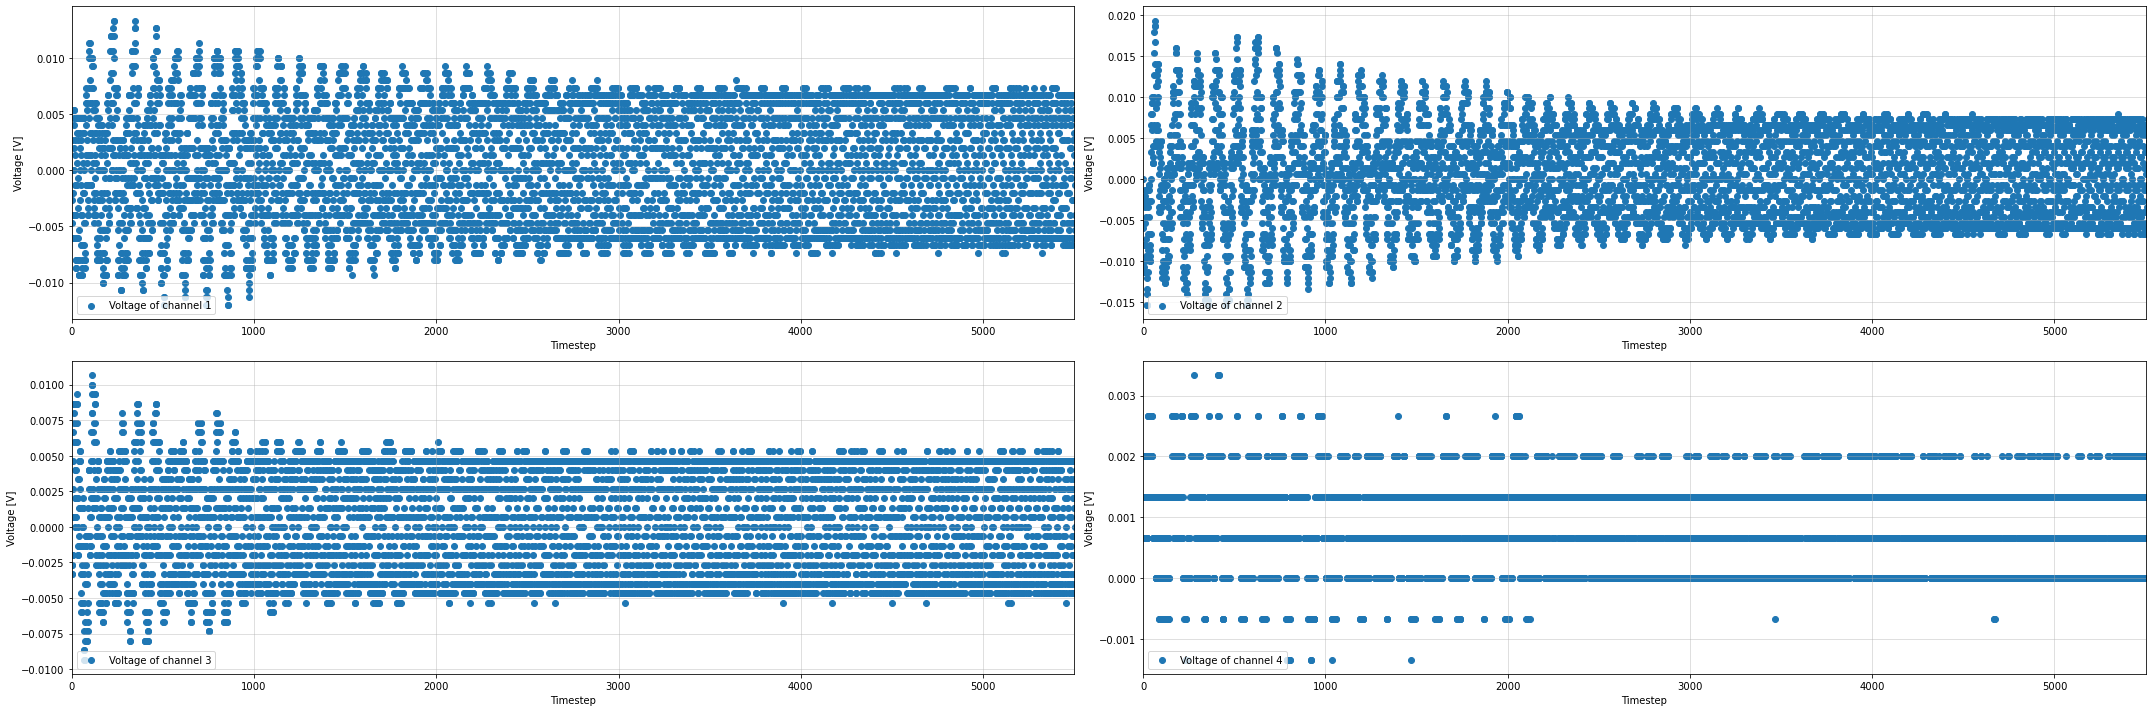

In [68]:
pos = 1008
file = df.LyA.iloc[pos]
print(file)
data = Trc().open(file)
x = np.linspace(0, len(data[0][0])-1, len(data[0][0]))
y = data[1]

fig = plt.figure(layout = 'tight', figsize = (30,10))
gs = GridSpec(2, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

for i, ax in enumerate(fig.axes):
    currt = df['time_ch' + str(i+1)].iloc[pos]
    currt = currt if currt != 'None' else []
    currh = df['height_ch' + str(i+1)].iloc[pos]
    currh = [-val for val in currh] if currh != 'None' else []
    
    ax.grid(alpha = 0.5)
    ax.scatter(x, y[i], label = 'Voltage of channel ' + str(i+1))
    ax.scatter(currt, currh)
    
    ax.set_xlabel(xlabel = 'Timestep')
    ax.set_ylabel(ylabel = 'Voltage [V]')
    ax.legend(loc = 'lower left')
    ax.set_xlim(0, 5500)

In [85]:
dfs = df.beam_start
dff = df.beam_stop
dft = [bal-val for val,bal in zip(dfs,dff)]
dfavt = np.average([val for val in dft if val > 0])
time = data[0][0]
print((time[-1]-time[0]), (time[-1]-time[0])/dfavt)

1.0000999717152403e-05 8.905748730926575


In [75]:
dt = datafile[[True if val in ['24_05_23','24_05_24'] else False for val in datafile['Date']]].reset_index(drop = True)

In [79]:
for i in set(dt.run):
    print(len(dt[dt.run == i]), i)
    print()

24 0.0

2 454.0

10 455.0

12 456.0

19 457.0

90 458.0

90 459.0

90 460.0

90 461.0

90 462.0

90 463.0

90 464.0

90 465.0

90 466.0

90 467.0

90 468.0

90 469.0

90 470.0

90 471.0

90 472.0

90 473.0

90 474.0

90 475.0

90 476.0

90 477.0

90 478.0

90 479.0

90 480.0

90 481.0

12 482.0



In [83]:
dt[dt.run == 480]

,Date,Time,Datetime,run,event_number,DAQ,pbar_trap,positron,MCP1,MCP2,MCP3,MCP3.5,MCP4,MCP5,MCP7,Waveform_12bit,CMOS_Tracker,DRS4,Positron_CH1,Positron_CH2,Positron_CH3,Positron_CH4,SD,LyA,SD_LyA,Cy_Des,NE00_I,NE50_I,NE00_Bm1,NE00_Bm2,NE00_Bm3,NE50_Bm1,NE50_Bm2,Int,Valve_in,MCP_in,MW_power,H-sou_pressure,cube_pressure,RC_pressure,MW_pressure,SwY_pressure,LyA_pressure,Main_delay,PCOs_delay,LyA_delay,Laser_delay,FC_current,MCP4_current,MCP5_current,St_dec_up,St_dec_dw,St_dec_ri,St_dec_le,St_Cub_up,St_Cub_dw,St_Cub_ri,St_Cub_le,St_RC1_up,St_RC1_dw,St_RC1_ri,St_RC1_le,St_RC2_up,St_RC2_dw,St_RC2_ri,St_RC2_le,St_RC3_up,St_RC3_dw,St_RC3_ri,St_RC3_le,St_Al1_up,St_Al1_dw,St_Al1_ri,St_Al1_le,St_Al2_up,St_Al2_dw,St_Al2_ri,St_Al2_le,QT_RC1_+,QT_RC1_-,QT_RC2_+,QT_RC2_-,QT_RC3_+,QT_RC3_-,SwY_1_+,SwY_1_-,SwY_3_+,SwY_3_-,EL_pT_in,EL_pT_1,EL_pT_2,EL_pT_3,EL_pT_4,EL_RC_in,EL_SwY_+,EL_Al1_+,EL_Al2_+,EL_Al3_+,Ly_MCP_1,Ly_MCP_2,Ly_MCP_3,Ly_MCP_4,Qnch_+,Qnch_-,TgDefl_+,H-Defl_+,H-Cor1_-,H-Cor1-,1_phos_+,1_mcp_+,2_phos_+,2_mcp_+,3_phos_+,3_mcp_+,3.5_grid_-,3.5_phos_+,3.5_mcp_+,4_phos_+,4_mcp_+,5_phos_+,5_mcp_+,6_phos_+,6_mcp_+,7_phos_+,7_mcp_+,Sci_1_-,Sci_2_-,H_offs,target_pos,front_bias,mw_amp_curr,hfs_temp,hfs_freq,hfs_pow,sc_temp,sc_freq,sc_pow,empty_1,empty_2,empty_3,empty_4,empty_5,empty_6,empty_7,empty_8
2044,24_05_24,1.716523e+09,2024-05-24 06:02:35.310000,480.0,1,9.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_05_24/WF12...,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_05_24/24_0...,None,Hminus_Commissioning_2024,0.0,10.545,1.0,0.0,1.0,0.0,0.0,51.788,872451015.0,0.0,-1.704745e-07,1.290000e-08,6.390000e-09,1.977000e-09,2.500000e-09,4.140000e-09,1.010000e-09,0.000902,0.001002,0.00101,0.000336,1.402199e-07,1.307424e-07,0.000072,49.96286,-49.99169,0.040224,0.019900,-24.98480,25.01228,-19.98482,19.96916,-24.98786,24.95401,-11.99213,11.97522,-9.887298,9.846253,-17.87070,17.89155,-0.016055,-0.000045,0.023901,0.027719,0.014156,0.027505,0.024264,0.023472,0.029375,0.012476,0.011661,0.015218,19.52913,-20.17527,34.53914,-35.16301,27.56458,-28.13750,899.6410,-900.0582,599.6742,-600.0702,-3099.998,-3299.999,-2999.998,-2800.001,-2900.000,-2550.001,-0.075553,-0.243859,-0.163386,-0.181779,-2099.998,-2099.997,-2100.001,-2100.002,2999.999,-0.160199,-0.020957,-0.047449,-0.763885,-0.763802,0.10218,-0.024289,-0.025138,-0.014655,-0.028002,-0.027175,0.059283,-0.009781,-0.045050,-0.121926,-0.014161,4000.001,2000.000,-0.143606,-0.146286,0.018594,-0.033102,-0.752161,-0.741825,0.000103,50.937,0.0,10.25,48.7,1.162000e+09,-100.0,48.6,1000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2045,24_05_24,1.716523e+09,2024-05-24 06:03:08.615000,480.0,2,9.0,0,0,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_05_24/WF12...,None,None,None,None,None,None,None,/eos/experiment/gbar/pgunpc/data/24_05_24/24_0...,None,Hminus_Commissioning_2024,0.0,9.187,1.0,0.0,1.0,0.0,0.0,0.017,872451015.0,0.0,-1.558743e-07,1.280000e-08,6.400000e-09,1.987000e-09,2.510000e-09,4.130000e-09,1.010000e-09,0.000902,0.001002,0.00101,0.000336,1.427388e-07,1.193249e-07,0.000072,49.96307,-49.99258,0.039179,0.019039,-24.98587,25.01200,-19.98564,19.96954,-24.98886,24.95424,-11.99349,11.97513,-9.887906,9.846764,-17.87094,17.89098,0.005319,0.031662,0.022426,0.027719,0.016645,0.029248,0.022522,0.022475,0.027383,0.013721,0.012905,0.016463,19.52976,-20.17367,34.54016,-35.16082,27.56612,-28.13536,899.6420,-900.0560,599.6744,-600.0677,-3099.999,-3300.000,-3000.002,-2800.001,-2900.002,-2550.003,-0.075553,-0.243859,-0.160924,-0.181779,-2100.004,-2100.001,-2100.001,-2099.999,3000.000,-0.874963,-0.013582,-0.044975,-0.763885,-0.763802,0.10218,-0.024289,-0.023654,-0.014655,-0.026521,-0.030141,0.051867,-0.009781,-0.050969,-0.117971,-0.014161,4000.005,2000.000,-0.148556,-0.167059,0.018594,-0.025691,-0.752161,-0.741825,0.000103,50.935,0.0,10.26,48.8,1.162000e+09,-100.0,48.5,1000000.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2046,24_05_24,1.716523e+09,2024-0

In [24]:
df1 = lydf[[True if val in [411,412] else False for val in lydf['run number']]]
df2 = lydf[[True if 428 <= val <= 451 else False for val in lydf['run number']]]
len(df1), len(df2)

(253, 2160)

In [57]:
df1 = lydf[[True if val in [411,412] else False for val in lydf['run number']]]
df2 = lydf[[True if 428 <= val <= 451 else False for val in lydf['run number']]]
print(len(df1), len(df2))

start = 8
df1 = df1[[True if start <= val <= start + 1 else False for val in df1['NE50_I']]]
df2 = df2[[True if start <= val <= start + 1 else False for val in df2['NE50_I']]]
print(len(df1), len(df2))

253 2160
95 123


In [82]:
start = 1
stop = start + 14

df1 = lydf[[True if val in [411,412] else False for val in lydf['run number']]]
df2 = lydf[[True if 428 <= val <= 451 else False for val in lydf['run number']]]

df1 = df1[[True if start <= val <= stop else False for val in df1['NE50_I']]]
df2 = df2[[True if start <= val <= stop else False for val in df2['NE50_I']]]

h1 = list(df1['time ch1']) + list(df1['time ch2']) + list(df1['time ch3']) + list(df1['time ch4'])
h1 = [val for bal in h1 if bal != 'NaN' for val in bal]

h2 = list(df2['time ch1']) + list(df2['time ch2']) + list(df2['time ch3']) + list(df2['time ch4'])
h2 = [val for bal in h2 if bal != 'NaN' for val in bal]

print(len(df1), len(df2))
print(len(h1), len(h2))
print(len(h1) / len(df1), len(h2) / len(df2))
print((len(h2) / len(df2)) / (len(h1) / len(df1)))

246 1383
1307 17266
5.313008130081301 12.484454085321765
2.3497901338861165


In [26]:
pdf = read_df()
ppdf = pdf[[True if 428 <= val <= 429 else False for val in ldf['run number']]].reset_index(drop = True)

In [57]:
len(pdf[pdf['Date'] == '24_05_17'])

1347

In [37]:
pdf.iloc[149]['LyA']

'/eos/experiment/gbar/pgunpc/data/24_04_30/24_04_30lya/LY1234.1714469387.733.trc'

In [6]:
lldf = ldf[[True if 428 <= val <= 429 else False for val in ldf['run number']]].reset_index(drop = True)

In [32]:
pos = 174
file = ppdf['LyA'].iloc[pos]
pf = Lfile(file)
file 

'/eos/experiment/gbar/pgunpc/data/24_05_16/24_05_16lya/LY1234.1715885866.981.trc'

In [34]:
ppdf.iloc[pos]['height ch1'], ppdf.iloc[pos]['time ch1']

([0.03599996748380363, 0.1306667571188882, 0.05799999606097117],
 [4868, 4936, 5132])

In [15]:
waveform = wf(date).wf_data()
waveform

The waveform datafile for 24_05_16 already exists.


,Time,datetime,Waveform,run number,NE50_I,beam start,beam stop
0,1715880259,2024-05-16 19:24:19,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,417,10.866,0.000005,0.000006
1,1715880274,2024-05-16 19:24:34,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,417,10.511,0.000005,0.000006
2,1715880308,2024-05-16 19:25:08,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,417,9.878,0.000005,0.000006
3,1715880322,2024-05-16 19:25:22,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,417,11.685,0.000005,0.000006
4,1715880337,2024-05-16 19:25:37,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,417,12.807,0.000005,0.000006
...,...,...,...,...,...,...,...
886,1715896719,2024-05-16 23:58:39,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,437,9.784,0.000005,0.000006
887,1715896733,2024-05-16 23:58:53,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,437,2.208,0.000005,0.000006
888,1715896766,2024-05-16 23:59:26,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,437,9.315,0.000005,0.000006
889,1715896780,2024-05-16 23:59:40,/eos/experiment/gbar/pgunpc/data/24_05_16/WF12...,437,10.902,0.000005,0.000006


In [18]:
peaks = Ldate(date).peaks_data()
peaks

The peaks datafile for the date 24_05_16 already exists.


,LyA,run number,microwave,time ch1,height ch1,time ch2,height ch2,time ch3,height ch3,time ch4,height ch4
0,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,417.0,off,[5036],[0.027999957092106342],"[5016, 5370, 5704]","[0.1126667337375693, 0.040666640212293714, 0.0...",NaN,NaN,"[5034, 5111]","[0.11200006620492786, 0.13600009738001972]"
1,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,417.0,off,"[4832, 5015, 5106, 5258]","[0.09933338308474049, 0.04599998047342524, 0.1...","[4857, 4989, 5179, 5547, 5874]","[0.07733335450757295, 0.039999972679652274, 0....",NaN,NaN,"[4990, 5178, 5397, 5550, 7015]","[0.06733334151795134, 0.021333281765691936, 0...."
2,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,417.0,off,"[4874, 5401]","[0.1453334428369999, 0.03266662982059643]","[4854, 4936, 5016]","[0.02533328696154058, 0.10466672334587201, 0.0...","[4872, 5201, 5310, 5687]","[0.029333292157389224, 0.07933335710549727, 0....","[4857, 4988, 5090, 5414, 5966]","[0.0239999518962577, 0.09533337788889185, 0.14..."
3,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,417.0,off,"[4825, 4880, 4962]","[0.06066666619153693, 0.1453334428369999, 0.14...","[4804, 4875, 5000, 5065, 5215]","[0.040666640212293714, 0.03266662982059643, 0....","[5120, 5206, 5267]","[0.029999959690030664, 0.019333279167767614, 0...","[4889, 4943, 5005, 5196]","[0.07666668697493151, 0.05733332852832973, 0.0..."
4,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,417.0,off,"[4896, 5012, 5064, 5144, 5294]","[0.12000007659662515, 0.031333294755313545, 0....","[4172, 4703, 4911, 5079, 5139]","[0.041333307744935155, 0.013333271373994648, 0...",[5340],[0.07266668177908286],"[4702, 4850, 4909, 5088, 5205, 5320, 5382, 7537]","[0.1453334428369999, 0.05999999865889549, 0.14..."
...,...,...,...,...,...,...,...,...,...,...,...
886,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,437.0,on,"[4794, 4890, 4956, 5021, 5121]","[0.12866675452096388, 0.05399999086512253, 0.1...","[4860, 4923, 5019, 5091]","[0.04799998307134956, 0.07400001684436575, 0.0...","[4826, 4931, 5069, 5170]","[0.12933342205360532, 0.0733333493117243, 0.14...","[4848, 5085]","[0.020666614233050495, 0.013999938906636089]"
887,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,437.0,on,"[5028, 5208]","[0.1160000714007765, 0.07733335450757295]",[5093],[0.1060000584111549],"[4978, 5943]","[0.07600001944229007, 0.031333294755313545]","[5073, 5648]","[0.1453334428369999, 0.02533328696154058]"
888,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,437.0,on,"[4906, 4972]","[0.12133341166190803, 0.06066666619153693]",[4904],[0.08533336489927024],"[4657, 4784, 4859, 5021]","[0.0239999518962577, 0.09933338308474049, 0.14...","[4906, 5060, 5202, 5610]","[0.0453333129407838, 0.1453334428369999, 0.038..."
889,/eos/experiment/gbar/pgunpc/data/24_05_16/24_0...,437.0,on,"[4905, 4971, 5089]","[0.042666642810218036, 0.1453334428369999, 0.0...","[4734, 4822, 4891, 5013, 5077, 5156]","[0.06533333892002702, 0.052666655799839646, 0....","[4757, 4845, 4904, 4960, 6881]","[0.0453333129407838, 0.12000007659662515, 0.14...","[4896, 5053, 5257, 6644]","[0.1453334428369999, 0.017999944102484733, 0.1..."


In [45]:
df1 = lydf[[True if 428 <= val <= 451 else False for val in lydf['run']]]
df2 = lydf[[True if 458 <= val <= 481 else False for val in lydf['run']]]

In [46]:
df1 = df1[df1['NE50_I'] >= 1]
df2 = df2[df2['NE50_I'] >= 1]

df1f = df1[df1.microwave == 'off']
df1n = df1[df1.microwave == 'on']
df2f = df2[df2.microwave == 'off']
df2n = df2[df2.microwave == 'on']

In [47]:
print(len(df1f), len(df1n))
print(len(df2f), len(df2n))

i1f = np.average(df1f.NE50_I)
i1n = np.average(df1n.NE50_I)
i2f = np.average(df2f.NE50_I)
i2n = np.average(df2n.NE50_I)

print(i1f, i1n)
print(i2f, i2n)

686 697
1051 1060
8.438556851311946 8.17437733142037
9.326013320647002 9.295953773584912


In [18]:
p1f = [[],[],[],[]]
p1n = [[],[],[],[]]
p2f = [[],[],[],[]]
p2n = [[],[],[],[]]

for i in range(4):
    p1f[i] = [val for bal in df1f['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    p1n[i] = [val for bal in df1n['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    p2f[i] = [val for bal in df2f['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    p2n[i] = [val for bal in df2n['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    
p1f = [val for bal in p1f for val in bal]
p1n = [val for bal in p1n for val in bal]
p2f = [val for bal in p2f for val in bal]
p2n = [val for bal in p2n for val in bal]

In [48]:
print(len(p1f), len(p1n))
print(len(p2f), len(p2n))

10733 9890
8349 8186


In [49]:
print(len(p1f)/len(df1f), len(p1n)/len(df1n))
print(len(p2f)/len(df2f), len(p2n)/len(df2n))

15.645772594752186 14.189383070301291
7.943862987630828 7.722641509433962


In [50]:
print(len(p1f)/len(df1f), len(p1n)/len(df1n) * i1f/i1n)
print(len(p2f)/len(df2f) * i1f/i2f, len(p2n)/len(df2n) * i1f/i2n)

15.645772594752186 14.647955540728038
7.187930912745565 7.010356441835928


In [58]:
ldf1 = llydf[[True if 428 <= val <= 451 else False for val in llydf['run']]]
ldf2 = llydf[[True if 458 <= val <= 481 else False for val in llydf['run']]]

In [59]:
ldf1 = ldf1[ldf1['NE50_I'] >= 1]
ldf2 = ldf2[ldf2['NE50_I'] >= 1]

ldf1f = ldf1[ldf1.microwave == 'off']
ldf1n = ldf1[ldf1.microwave == 'on']
ldf2f = ldf2[ldf2.microwave == 'off']
ldf2n = ldf2[ldf2.microwave == 'on']

In [60]:
print(len(ldf1f), len(ldf1n))
print(len(ldf2f), len(ldf2n))

li1f = np.average(ldf1f.NE50_I)
li1n = np.average(ldf1n.NE50_I)
li2f = np.average(ldf2f.NE50_I)
li2n = np.average(ldf2n.NE50_I)

print(li1f, li1n)
print(li2f, li2n)

686 697
1051 1060
8.438556851311946 8.17437733142037
9.326013320647002 9.295953773584912


In [61]:
lp1f = [[],[],[],[]]
lp1n = [[],[],[],[]]
lp2f = [[],[],[],[]]
lp2n = [[],[],[],[]]

for i in range(4):
    lp1f[i] = [val for bal in ldf1f['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    lp1n[i] = [val for bal in ldf1n['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    lp2f[i] = [val for bal in ldf2f['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    lp2n[i] = [val for bal in ldf2n['height_ch' + str(i + 1)] if bal != 'NaN' for val in bal]
    
lp1f = [val for bal in lp1f for val in bal]
lp1n = [val for bal in lp1n for val in bal]
lp2f = [val for bal in lp2f for val in bal]
lp2n = [val for bal in lp2n for val in bal]

In [62]:
print(len(lp1f), len(lp1n))
print(len(lp2f), len(lp2n))

10424 9312
8192 7976


In [63]:
print(len(lp1f)/len(ldf1f), len(lp1n)/len(ldf1n))
print(len(lp2f)/len(ldf2f), len(lp2n)/len(ldf2n))

15.19533527696793 13.360114777618364
7.794481446241675 7.524528301886792


In [64]:
print(len(lp1f)/len(ldf1f), len(lp1n)/len(ldf1n) * li1f/li1n)
print(len(lp2f)/len(ldf2f) * li1f/li2f, len(lp2n)/len(ldf2n) * li1f/li2n)

15.19533527696793 13.791886956042415
7.052764407379526 6.830515878339037
